# Assignment 4
## Econ 8310 - Business Forecasting

This assignment will make use of the bayesian statistical models covered in Lessons 10 to 12. 

A/B Testing is a critical concept in data science, and for many companies one of the most relevant applications of data-driven decision-making. In order to improve product offerings, marketing campaigns, user interfaces, and many other user-facing interactions, scientists and engineers create experiments to determine the efficacy of proposed changes. Users are then randomly assigned to either the treatment or control group, and their behavior is recorded.
If the changes that the treatment group is exposed to can be measured to have a benefit in the metric of interest, then those changes are scaled up and rolled out to across all interactions.
Below is a short video detailing the A/B Testing process, in case you want to learn a bit more:
[https://youtu.be/DUNk4GPZ9bw](https://youtu.be/DUNk4GPZ9bw)

For this assignment, you will use an A/B test data set, which was pulled from the Kaggle website (https://www.kaggle.com/datasets/yufengsui/mobile-games-ab-testing). I have added the data from the page into Codio for you. It can be found in the cookie_cats.csv file in the file tree. It can also be found at [https://github.com/dustywhite7/Econ8310/raw/master/AssignmentData/cookie_cats.csv](https://github.com/dustywhite7/Econ8310/raw/master/AssignmentData/cookie_cats.csv)

The variables are defined as follows:

| Variable Name  | Definition |
|----------------|----|
| userid         | A unique number that identifies each player  |
| version        | Whether the player was put in the control group (gate_30 - a gate at level 30) or the group with the moved gate (gate_40 - a gate at level 40) |
| sum_gamerounds | The number of game rounds played by the player during the first 14 days after install.  |
| retention1     | Did the player come back and play 1 day after installing?     |
| retention7     | Did the player come back and play 7 days after installing?    |               

### The questions

You will be asked to answer the following questions in a small quiz on Canvas:
1. What was the effect of moving the gate from level 30 to level 40 on 1-day retention rates?
2. What was the effect of moving the gate from level 30 to level 40 on 7-day retention rates?
3. What was the biggest challenge for you in completing this assignment?

You will also be asked to submit a URL to your forked GitHub repository containing your code used to answer these questions.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
url = "https://github.com/dustywhite7/Econ8310/raw/master/AssignmentData/cookie_cats.csv"
df = pd.read_csv(url)
print(df.head())


   userid  version  sum_gamerounds  retention_1  retention_7
0     116  gate_30               3        False        False
1     337  gate_30              38         True        False
2     377  gate_40             165         True        False
3     483  gate_40               1        False        False
4     488  gate_40             179         True         True


In [21]:
# Count and display the number of unique players
print("Number of players: \n", df.userid.nunique(), '\n',
        "Number of records: \n", len(df.userid),'\n')

Number of players: 
 90189 
 Number of records: 
 90189 



In [22]:
df.dtypes

userid             int64
version           object
sum_gamerounds     int64
retention_1         bool
retention_7         bool
dtype: object

In [23]:
# Convert boolean to integer (True → 1, False → 0)
df['retention_1'] = df['retention_1'].astype(int)
df['retention_7'] = df['retention_7'].astype(int)

# Check if it's correct
df[['retention_1', 'retention_7']].dtypes


retention_1    int32
retention_7    int32
dtype: object

In [24]:
# Control group (gate_30)
control = df[df['version'] == 'gate_30']

# Treatment group (gate_40)
treatment = df[df['version'] == 'gate_40']


In [25]:
print(df.info())
print(df['version'].value_counts())
print(df[['retention_1', 'retention_7']].mean())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  int32 
 4   retention_7     90189 non-null  int32 
dtypes: int32(2), int64(2), object(1)
memory usage: 2.8+ MB
None
version
gate_40    45489
gate_30    44700
Name: count, dtype: int64
retention_1    0.445210
retention_7    0.186065
dtype: float64


In [26]:
# 1-day retention rate by group
retention_1_rates = df.groupby('version')['retention_1'].mean() * 100
# 7-day retention rate by group
retention_7_rates = df.groupby('version')['retention_7'].mean() * 100

print("1-day retention rates (%):\n", retention_1_rates)
print("7-day retention rates (%):\n", retention_7_rates)


1-day retention rates (%):
 version
gate_30    44.818792
gate_40    44.228275
Name: retention_1, dtype: float64
7-day retention rates (%):
 version
gate_30    19.020134
gate_40    18.200004
Name: retention_7, dtype: float64


gate_30: 20034 successes out of 44700 trials
gate_40: 20119 successes out of 45489 trials


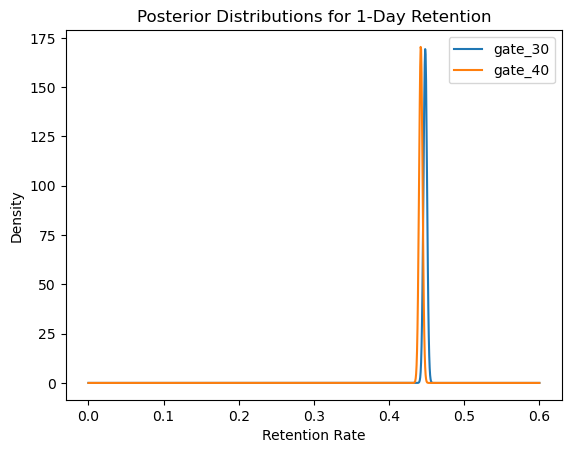

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Get successes and trials for each group
for group in ['gate_30', 'gate_40']:
    successes = df[df['version'] == group]['retention_1'].sum()
    trials = df[df['version'] == group]['retention_1'].count()
    print(f"{group}: {successes} successes out of {trials} trials")

# Example for 1-day retention
successes_30 = df[df['version'] == 'gate_30']['retention_1'].sum()
trials_30 = df[df['version'] == 'gate_30']['retention_1'].count()
successes_40 = df[df['version'] == 'gate_40']['retention_1'].sum()
trials_40 = df[df['version'] == 'gate_40']['retention_1'].count()

# Posterior distributions
x = np.linspace(0, 0.6, 1000)
posterior_30 = beta(successes_30 + 1, trials_30 - successes_30 + 1)
posterior_40 = beta(successes_40 + 1, trials_40 - successes_40 + 1)

plt.plot(x, posterior_30.pdf(x), label='gate_30')
plt.plot(x, posterior_40.pdf(x), label='gate_40')
plt.xlabel('Retention Rate')
plt.ylabel('Density')
plt.title('Posterior Distributions for 1-Day Retention')
plt.legend()
plt.show()


In [28]:
# Counting the number of players in each AB group.
players_g30 = df[df['version'] == 'gate_30']
players_g40 = df[df['version'] == 'gate_40']

In [29]:
# Calculating 1-day retention for each AB-group

# CONTROL GROUP
prop_gate30 = len(players_g30[players_g30['retention_1'] == True])/len(players_g30['retention_1']) * 100

# TREATMENT GROUP
prop_gate40 = len(players_g40[players_g40['retention_1'] == True])/len(players_g40['retention_1']) * 100

print('Group 30 at 1 day retention: ',str(round(prop_gate30,2)),"%","\n",
     'Group 40 at 1 day retention: ',str(round(prop_gate40,2)),"%")

Group 30 at 1 day retention:  44.82 % 
 Group 40 at 1 day retention:  44.23 %


In [30]:
# Calculating 1-day retention for each AB-group

# CONTROL GROUP
prop_gate30 = len(players_g30[players_g30['retention_7'] == True])/len(players_g30['retention_1']) * 100

# TREATMENT GROUP
prop_gate40 = len(players_g40[players_g40['retention_7'] == True])/len(players_g40['retention_1']) * 100

print('Group 30 at 1 day retention: ',str(round(prop_gate30,2)),"%","\n",
     'Group 40 at 1 day retention: ',str(round(prop_gate40,2)),"%")

Group 30 at 1 day retention:  19.02 % 
 Group 40 at 1 day retention:  18.2 %


In [31]:
# The % of users that came back the day after they installed
prop = len(df[df['retention_1'] == True]) / len(df['retention_1']) * 100

print("The overall retention for 1 day is: ", str(round(prop,2)),"%")

The overall retention for 1 day is:  44.52 %


In [32]:
# The % of users that came back the day after they installed
prop = len(df[df['retention_7'] == True]) / len(df['retention_7']) * 100

print("The overall retention for 7 day is: ", str(round(prop,2)),"%")

The overall retention for 7 day is:  18.61 %


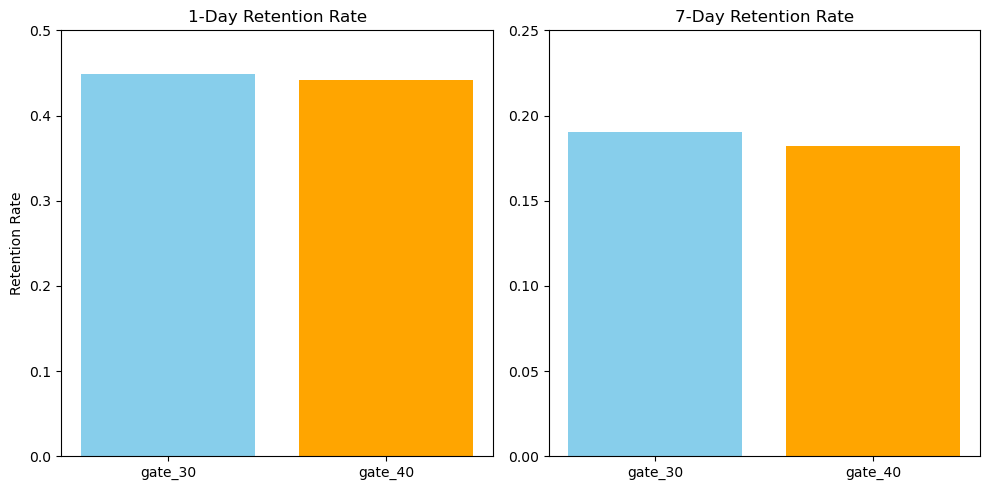

In [33]:
import matplotlib.pyplot as plt

# Calculate means
means = df.groupby('version')[['retention_1', 'retention_7']].mean().reset_index()

# Bar plot for 1-day and 7-day retention
fig, ax = plt.subplots(1, 2, figsize=(10,5))

# 1-day retention
ax[0].bar(means['version'], means['retention_1'], color=['skyblue', 'orange'])
ax[0].set_title('1-Day Retention Rate')
ax[0].set_ylabel('Retention Rate')
ax[0].set_ylim(0, 0.5)

# 7-day retention
ax[1].bar(means['version'], means['retention_7'], color=['skyblue', 'orange'])
ax[1].set_title('7-Day Retention Rate')
ax[1].set_ylim(0, 0.25)

plt.tight_layout()
plt.show()


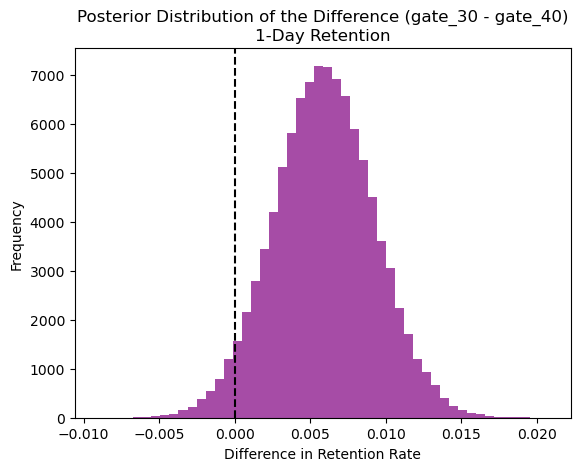

In [19]:
import numpy as np

# Simulate samples from the Beta posteriors
samples_30 = np.random.beta(successes_30 + 1, trials_30 - successes_30 + 1, 100000)
samples_40 = np.random.beta(successes_40 + 1, trials_40 - successes_40 + 1, 100000)
diff = samples_30 - samples_40

plt.hist(diff, bins=50, color='purple', alpha=0.7)
plt.title('Posterior Distribution of the Difference (gate_30 - gate_40)\n1-Day Retention')
plt.xlabel('Difference in Retention Rate')
plt.ylabel('Frequency')
plt.axvline(0, color='black', linestyle='--')
plt.show()


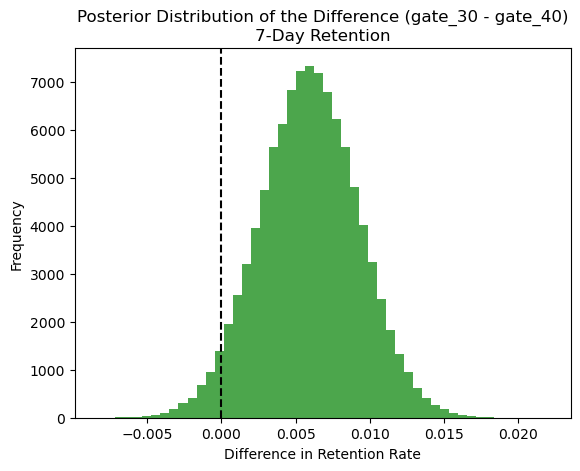

In [37]:
# Simulate samples from the Beta posteriors for retention 7
samples_30_ret7 = np.random.beta(successes_30 + 1, trials_30 - successes_30 + 1, 100000)
samples_40_ret7 = np.random.beta(successes_40 + 1, trials_40 - successes_40 + 1, 100000)
diff_ret7 = samples_30_ret7 - samples_40_ret7

# Plot the histogram
plt.hist(diff_ret7, bins=50, color='green', alpha=0.7)
plt.title('Posterior Distribution of the Difference (gate_30 - gate_40)\n7-Day Retention')
plt.xlabel('Difference in Retention Rate')
plt.ylabel('Frequency')
plt.axvline(0, color='black', linestyle='--')
plt.show()